# PySpark Setup

## What we'll cover ?

- Setting up Spark, Hadoop, Jupyteron our EC2 instance we created in last Jupyter Notebook.


## Steps :
**Step 1: Create an Amazon EC2 Instance :**
For simplicity we will use the Free Tier Micro Instance using Ubuntu 64x. Use all the default settings, except set All Traffic instead of SSH when editing the Security of the instance. This guide can be expanded to multiple instances or larger instances.

**Step 2: SSH into that instance (Windows)**
For Windows users, you’ll need to use PuTTY . Amazon has a really good set of instructions located here. Follow those to the point where you have the connection to the Ubuntu console.

**Step 3: SSH into that instance (Linux/Mac OS)**
An SSH client is already built into Mac and Linux (usually). You can just do a straightforward ssh command into your EC2 instance using your .pem file that you downloaded. Amazon also has instructions on this [here](http://docs.aws.amazon.com/AWSEC2/latest/UserGuide/AccessingInstancesLinux.html)

You should now have successfully connected to the command line of your virtual Ubuntu instance running on EC2. The rest of the guide will tell you commands to put into this terminal.
_____________________________

## Commands for terminal

**Step 4: Download and Install Anaconda** Next we will download and install Anaconda for our Python3.

```bash
$ wget https://repo.anaconda.com/archive/Anaconda3-2019.03-Linux-x86_64.sh```

```bash
$ bash Anaconda3-2019.03-Linux-x86_64.sh```

```bash
$ eval "$(/home/ubuntu/anaconda3/bin/conda shell.bash hook)"```

Press Enter through the license agreements, then Enter yes to accept, then Enter again to accept the default location.
_____________________________

**Step 5: Check which Python you are using.**
Ubuntu already comes with Python, but let’s make sure we are using the Anaconda version. Use:


```bash 
$ which python```

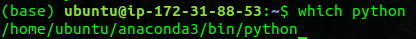

In case you aren’t using Anaconda’s version of Python (you can tell by checking the output of the which python command). Change to the Anaconda version of Python by specifying your source using:


```bash 
$ source .bashrc```

Then confirm with:

```bash 
$ which python```

Or you can just type python and check to see.
_____________________________

**Step 6: Configure Jupyter Notebook**

Jupyter comes with Anaconda, but we will need to configure it in order to use it through EC2 and connect with SSH. Go ahead and generate a configuration file for Jupyter using:

```bash 
$ jupyter notebook --generate-config```

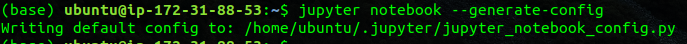
_____________________________

**Step 7: Create Certifications**

We can also create certifications for our connections in the form of .pem files. Perform the following:

```bash 
$ mkdir certs```

```bash 
$ cd certs```

```bash 
$ sudo openssl req -x509 -nodes -days 365 -newkey rsa:1024 -keyout mycert.pem -out mycert.pem ```

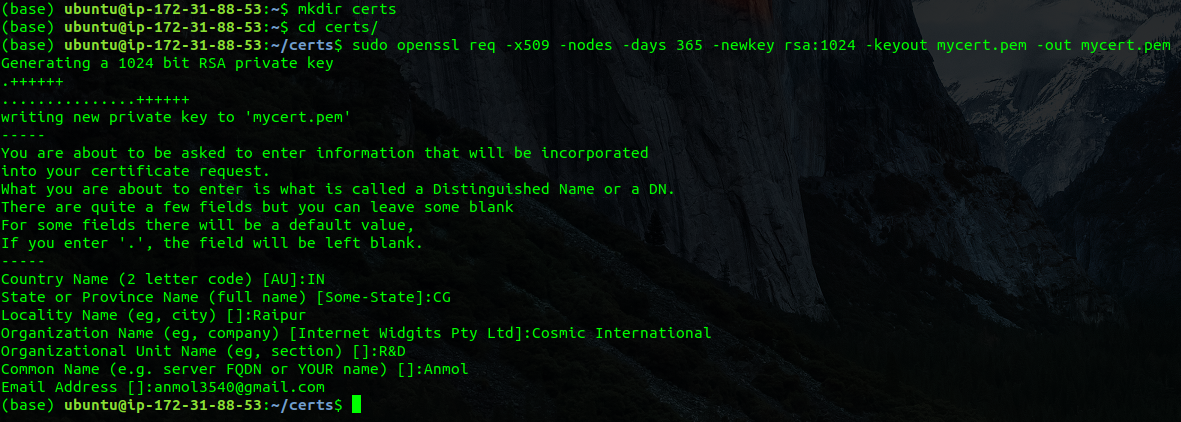

You’ll get asked some general questions after running that last line. Just fill them out with some general information.

Change the permissions on the .pem file with:

```bash 
sudo chmod 777 mycert.pem```
_____________________________

**Step 8: Edit Configuration File**

Next we need to finish editing the Jupyter Configuration file we created earlier. Change directory to:

```bash 
$ cd ~/.jupyter/```

Then we will use nano to edit the file. Type:

```bash 
$ nano jupyter_notebook_config.py```

You should see a bunch of commented Python code, this is where you can either uncomment lines or add in your own (things such as adding password protection are an option here). We will keep things simple.

Use keyboard to navigate and type, just as you would do for MSWord.

```python
c = get_config()

# Notebook config this is where you saved your pem cert
c.NotebookApp.certfile = u'/home/ubuntu/certs/mycert.pem' 
# Run on all IP addresses of your instance
c.NotebookApp.ip = '0.0.0.0'
# Don't open browser by default
c.NotebookApp.open_browser = False  
# Fix port to 8888
c.NotebookApp.port = 8888
```

Press Ctrl+O to save file in nano, Ctrl+X to exit the nano editor.
_____________________________

**Step 9: Check that Jupyter Notebook is working**

Now you can check to see that jupyter notebook is working. In your ubuntu console type:

```bash 
$ jupyter notebook```

You’ll see an output saying that a jupyter notebook is running at all ip addresses at port 8888. Go to your own web browser (Google Chrome suggested) and type in your Public DNS for your Amazon EC2 instance followed by :8888. It should be in the form:

```https://ec2-xx-xx-xxx-xxx.us-west-2.compute.amazonaws.com:8888```

After putting that into your browser you’ll probably get a warning of an untrusted certificate, go ahead and click through that and connect anyway, you trust the site. (Hopefully, after all you are the one that made it!)

You should be able to see Jupyter Notebook running on you EC2 instance. Great! Now we need to go back and install Scala, Java, Hadoop, and Spark on that same instance to get PySpark working correctly. Use Crtl-C in your EC2 Ubuntu console to kill the Jupyter Notebook process. Clear the console with clear and move on to the next steps to install Spark.
_____________________________

**Step 10: Install Java**

Next we need to install Java in order to install Scala, which we need for Spark. 
Back at your EC2 command line type:

```bash 
$ sudo apt-get update```

Then install Java with:

```bash 
$ sudo apt-get install default-jre```

Check that it worked with:

```bash 
$ java -version```

_____________________________

**Step 11: Install Scala**

Now we can install Scala:

```bash 
$ sudo apt-get install scala```

Check that it worked with:

```bash 
scala -version```
_____________________________

**Step 12: Install py4j**

We need to install the python library py4j, in order to this we need to make sure that pip install is connected to our Anaconda installation of Python instead of Ubuntu’s default. In the console we will export the path for pip:

```bash 
$ export PATH=$PATH:$HOME/anaconda3/bin```

Then use conda to install pip:

```bash 
$ conda install pip```

Confirm that the correct pip is being used with:

```bash
$ which pip```

Make sure it is in anaconda3 directory.

Now we can install py4j with pip:

```bash
$ pip install py4j```

**Step 13: Install Spark and Hadoop**
Use the following to download and install Spark and Hadoop:

```bash
$ wget https://www-eu.apache.org/dist/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz
```

```bash
$ sudo tar -xvzf spark-2.4.3-bin-hadoop2.7.tgz
```

**Step 14: Tell Python where to find Spark** 

Finally we need to set our Paths for Spark so Python can find it:

```bash
$ export SPARK_HOME='/home/ubuntu/spark-2.0.0-bin-hadoop2.7'
$ export PATH=$SPARK_HOME:$PATH
$ export PYTHONPATH=$SPARK_HOME/python:$PYTHONPATH
```

**Step 15: Install Jupyter NoteBook Extensions**

```bash
pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install
```

**Step 16: Launch Jupyter Notebook**

You should now have everything set up to launch Juptyer notebook with Spark! Run:
```bash
$ jupyter notebook
```
Then as previously done, connect through your browser again to your instance’s Jupyter Notebook. Launch a new notebook and in a notebook cell type:

```python
from pyspark import SparkContext
sc = SparkContext()
```